In [38]:
!mkdir datasets
!kaggle datasets download nayansubedi1/airplane-crashes-and-fatalities-upto-2023 -p datasets

�������� ��� 䠩� datasets 㦥 �������.


Dataset URL: https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023
License(s): DbCL-1.0
airplane-crashes-and-fatalities-upto-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
import zipfile
import os

ds_dir = 'datasets/'

for file in os.listdir(ds_dir):
    if file.endswith('.zip'):
        with zipfile.ZipFile(f'{ds_dir}{file}', 'r') as f:
            f.extractall(ds_dir)

os.listdir(ds_dir)

import pandas as pd

def load_df(ds_path, **kwargs):
    if ds_path.endswith('.csv'):
        return pd.read_csv(ds_path, **kwargs)
    elif ds_path.endswith(('.xlsx', '.xls')):
        return pd.read_excel(ds_path, **kwargs)
    else:
        raise ValueError(f"Unsupported file type: {ds_path}")
    
os.listdir(ds_dir)

['airplane-crashes-and-fatalities-upto-2023.zip',
 'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv']

In [40]:
file = [f for f in os.listdir(ds_dir) if f.endswith('.csv')][0]
file_path = ds_dir + file
file_path


'datasets/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'

In [41]:
import chardet

with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

Detected encoding: Windows-1252


In [42]:
pd.set_option('display.max_rows', None)

df = load_df(file_path, encoding=encoding)
df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [66]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

2486   NaT
4298   NaT
3682   NaT
3959   NaT
2630   NaT
2907   NaT
882    NaT
1336   NaT
3302   NaT
1548   NaT
1502   NaT
1540   NaT
2792   NaT
2044   NaT
2427   NaT
Name: Time, dtype: datetime64[ns]

In [46]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

In [47]:
df['Survival Rate'] = 1 - df['Fatalities'] / df['Aboard']
df['Survival Rate Passangers'] = 1 - df['Fatalities Passangers'] / df['Aboard Passangers']
df['Survival Rate Crew'] = 1 - df['Fatalities Crew'] / df['Aboard Crew']


In [62]:
# let's simply drop rows with negative survival rate which indicates that data is incorrect
df = df[~(df['Survival Rate Crew'] < 0)]
df = df[~(df['Survival Rate Passangers'] < 0)]


In [63]:
df.describe()


,Date,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Survival Rate,Survival Rate Passangers,Survival Rate Crew,Decade
count,4993,4975.000000,4764.000000,4767.000000,4985.000000,4751.00000,4752.000000,4951.000000,4970.000000,3891.000000,4742.000000,4993.000000
mean,1971-06-30 04:01:58.245543760,31.200603,27.014274,4.479127,22.378335,19.00000,3.576389,1.720864,0.181485,0.206330,0.166685,1966.388945
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,1951-06-06 00:00:00,7.000000,3.000000,2.000000,4.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
50%,1970-11-14 00:00:00,16.000000,12.000000,4.000000,11.000000,8.00000,3.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
75%,1992-06-07 00:00:00,35.000000,30.000000,6.000000,25.000000,21.00000,5.000000,0.000000,0.250000,0.307179,0.142857,1990.000000
max,2023-11-01 00:00:00,644.000000,614.000000,61.000000,583.000000,560.00000,46.000000,2750.000000,1.000000,1.000000,1.000000,2020.000000
std,NaN,45.554829,44.132021,3.485227,35.077650,34.02578,3.168471,55.568289,0.311716,0.340197,0.321735,25.040803


Avg survival rate of passengers in higher than crew. We can test this hypothesis later.


In [50]:
df.describe(include='object')


,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Summary
count,3483,4994,4988,1329,4221,4983,4724,4330,4934
unique,1057,4122,2264,880,3825,2463,4689,3818,4839
top,15:00:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,1,Crashed under unknown circumstances.
freq,38,17,255,36,93,333,3,14,9


In [51]:
pd.concat([df.isnull().sum(), (df.isnull().sum() / df.shape[0] * 100).round(1)], axis=1, keys=['total', '%'])


,total,%
Date,0,0.0
Time,1515,30.3
Location,4,0.1
Operator,10,0.2
Flight #,3669,73.4
Route,777,15.5
AC Type,15,0.3
Registration,274,5.5
cn/ln,668,13.4
Aboard,18,0.4


In [53]:
import plotly.express as px

year_counts = df['Date'].dt.year.value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

fig = px.line(year_counts, x='year', y='count',
                 title='Number of Airplane Crashes by Year')

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Crashes',
                  height=600,
                  xaxis=dict(tickmode='linear', dtick=10))

fig.show()

In [68]:
# Calculate average survival rate per year
df['Year'] = df['Date'].dt.year
yearly_survival = df.groupby('Year')['Survival Rate'].mean().reset_index()

# Create the line plot
fig = px.line(yearly_survival, x='Year', y='Survival Rate',
              title='Average Survival Rate of Airplane Crashes by Year')

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Average Survival Rate',
                  height=600,
                  xaxis=dict(tickmode='linear', dtick=10))

fig.show()


In [110]:
import scipy.stats as stats
import numpy as np

# Statistics for fatalities
fatalities_stats = stats.describe(df['Fatalities'].dropna())

for s, val in fatalities_stats._asdict().items():
    print(s, val)


nobs 4985
minmax (np.float64(0.0), np.float64(583.0))
mean 22.378335005015046
variance 1230.4415048516335
skewness 4.6039972358959815
kurtosis 36.56270535309226


In [111]:
# Statistics for survival rate
survival_stats = stats.describe(df['Survival Rate'].dropna())

for s, val in survival_stats._asdict().items():
    print(s, val)

nobs 4970
minmax (np.float64(0.0), np.float64(1.0))
mean 0.1814848618838318
variance 0.09716676790962253
skewness 1.5461881975858294
kurtosis 0.8996941621634238


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(data, **hist_kws):
    plt.figure(figsize=(12, 6))
    
    sns.histplot(data, kde=True, color="blue", alpha=0.5, **hist_kws)
    
    mean = data.mean()
    median = data.median()
    std = data.std()
    
    plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')
    plt.axvline(mean + std, color='orange', linestyle='dashed', label=f'Mean + Std: {mean + std:.2f}')
    plt.axvline(mean - std, color='orange', linestyle='dashed', label=f'Mean - Std: {mean - std:.2f}')
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()


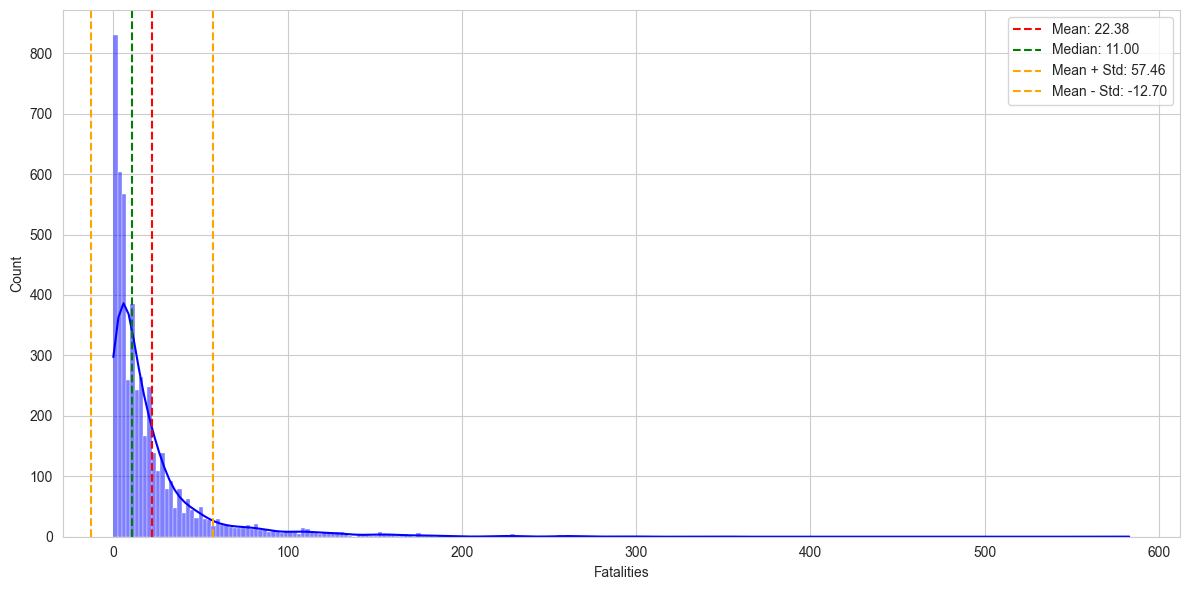

In [90]:
plot_distribution(df['Fatalities'])

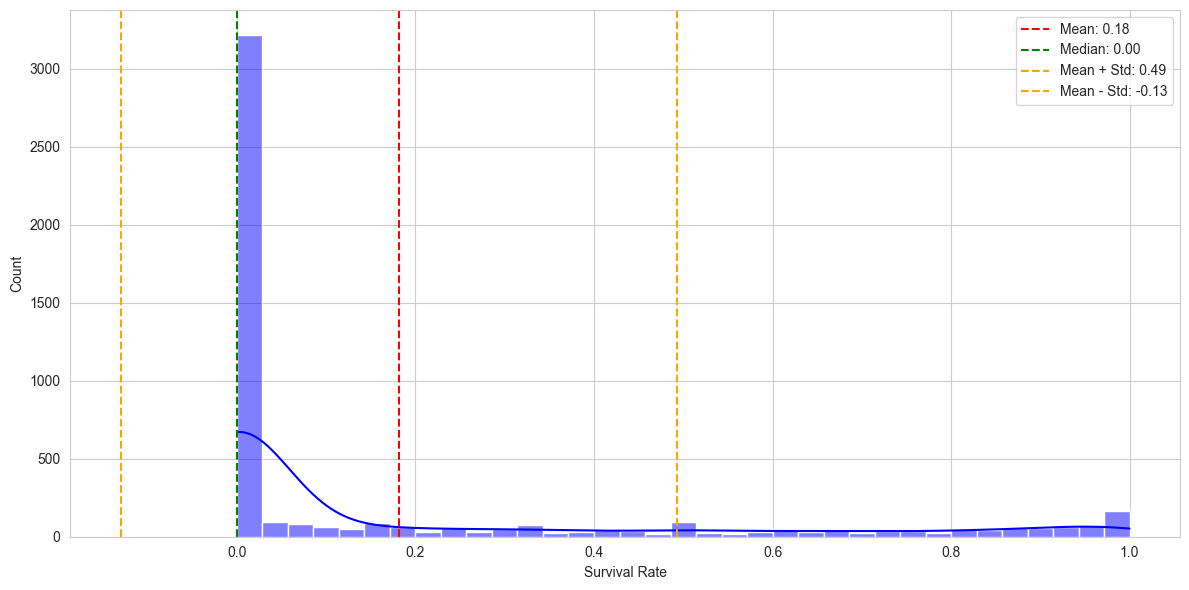

In [92]:
plot_distribution(df['Survival Rate'])


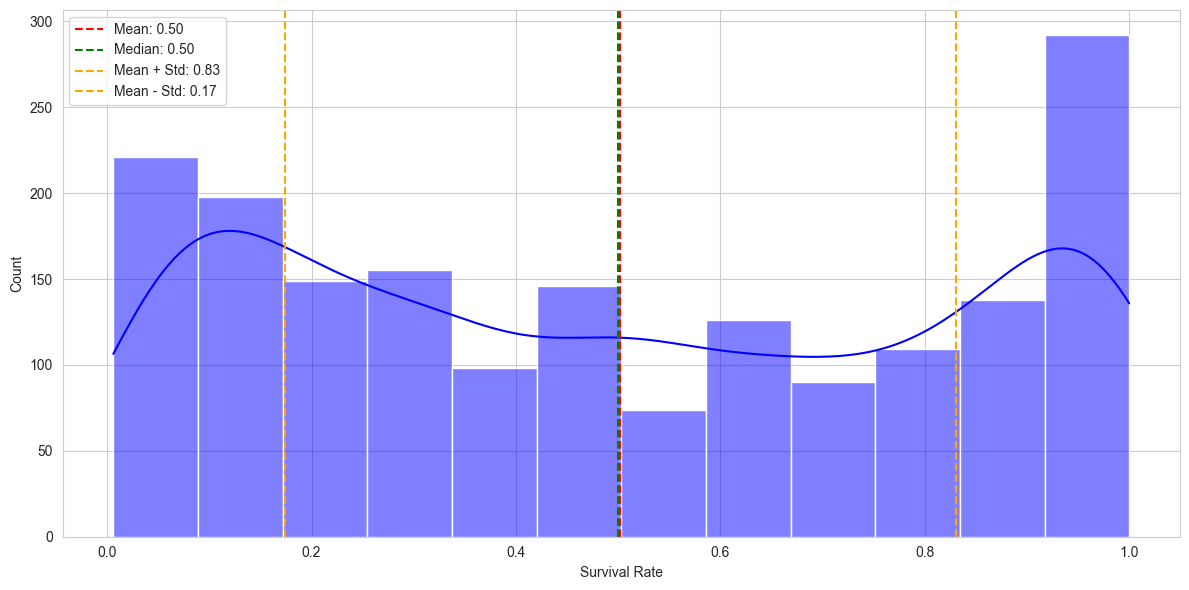

In [95]:
plot_distribution(df.loc[df['Survival Rate'] > 0, 'Survival Rate'])

 Survival rate has interesting distribution


In [100]:
df[['Survival Rate Passangers', 'Survival Rate Crew']].isnull().sum()


Survival Rate Passangers    1102
Survival Rate Crew           251
dtype: int64

In [101]:
import scipy.stats as stats


t_statistic, p_value = stats.ttest_ind(df['Survival Rate Passangers'].dropna(), 
                                       df['Survival Rate Crew'].dropna())

print("Two-sample t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in statistically significant.")
else:
    print("There is no statistically significant difference")


df.describe()[['Survival Rate Passangers', 'Survival Rate Crew']]


Two-sample t-test results:
t-statistic: 5.550914054366086
p-value: 2.9259837594532336e-08
The difference in statistically significant.


,Survival Rate Passangers,Survival Rate Crew
count,3891.000000,4742.000000
mean,0.206330,0.166685
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.307179,0.142857
max,1.000000,1.000000
std,0.340197,0.321735


In [112]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,...,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Survival Rate,Survival Rate Passangers,Survival Rate Crew,Decade,Year
0,1908-09-17,NaT,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",0.5,0.0,1.0,1900,1908
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,...,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,0.0,NaN,1.0,1900,1909
2,1912-07-12,NaT,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,NaN,0.0,1910,1912
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,...,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,NaN,0.0,1910,1913
4,1913-09-09,NaT,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,...,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,0.3,NaN,NaN,1910,1913


C:\Users\Vlad\AppData\Local\Temp\ipykernel_4816\902901230.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




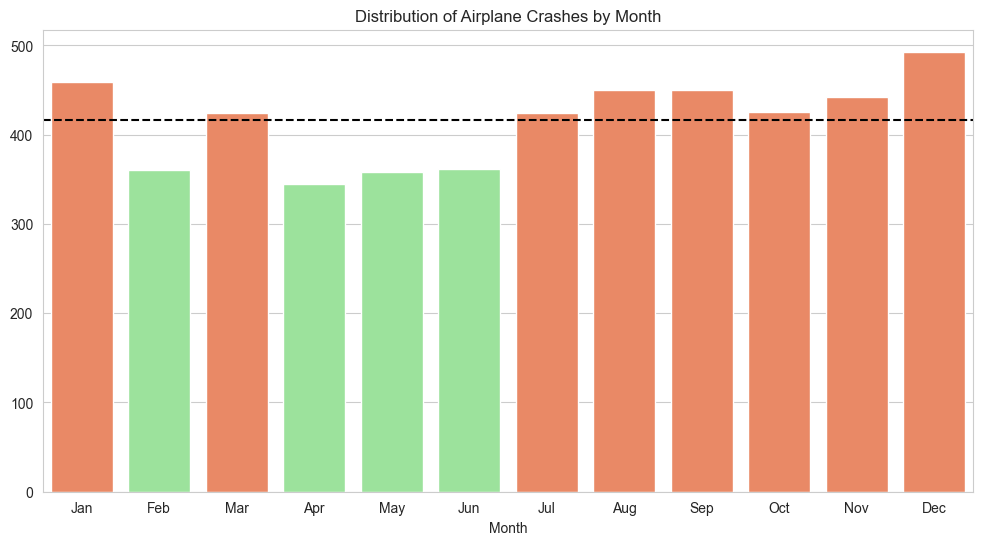

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Month'] = df['Date'].dt.month
crashes_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

colors = ['coral' if val > crashes_month.mean() else 'lightgreen' for val in crashes_month.values]

sns.barplot(x=crashes_month.index, y=crashes_month.values, palette=colors)
plt.axhline(y=crashes_month.mean(), color='black', linestyle='--', label='Average')

plt.title('Distribution of Airplane Crashes by Month')
plt.xticks(range(12), pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS').strftime('%b'))


plt.show()


In [133]:
from scipy.stats import chisquare

# Lets perform chi square test to check if any month has significantly more or less crashes

# Our expected frequency is should be equal to mean for all months then
expected_freq = [crashes_month.mean()] * 12

chi_stat, p_value = chisquare(crashes_month.values, f_exp=expected_freq)

print(f"Chi-squarE: {chi_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("THe result is significant")
    z_scores = (crashes_month - crashes_month.mean()) / crashes_month.std()
    print("z-scores:")
    for month, z_score in z_scores.items():
        month_name = pd.to_datetime(f"2024-{month}-01").strftime('%B')
        direction = "🔴" if z_score > 0 else "🟢"
        print(f"{direction} {month_name}: {z_score:.2f}")
else:
    print("Not significant")


Chi-squarE: 61.1678
p-value: 0.0000
THe result is significant
z-scores:
🔴 January: 0.89
🟢 February: -1.17
🔴 March: 0.16
🟢 April: -1.48
🟢 May: -1.21
🟢 June: -1.12
🔴 July: 0.16
🔴 August: 0.71
🔴 September: 0.71
🔴 October: 0.21
🔴 November: 0.54
🔴 December: 1.60
